# TIMESERIES
# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
import pandas as pd
df = pd.read_csv("exchange_rate.csv")

# Data Preparation and Exploration

In [3]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [5]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


# Line Plot

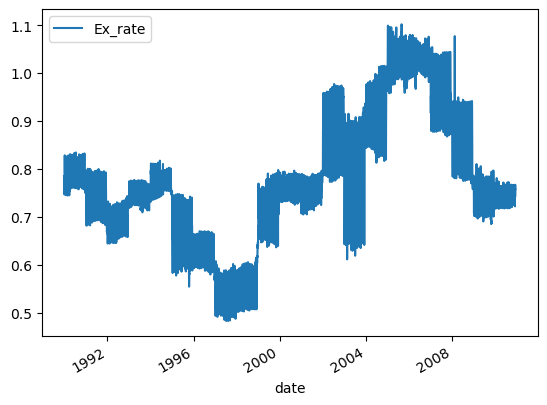

In [6]:
df1 =pd.read_csv("exchange_rate.csv", header=0, index_col=0,parse_dates=True)
df1.plot()
plt.show()

In [7]:
df1.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-02-01,0.7818
1990-03-01,0.7867
1990-04-01,0.7860
1990-05-01,0.7849


# Histogram & Density Plot

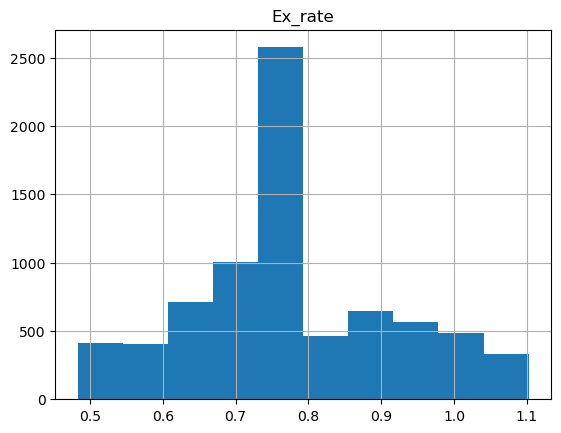

In [8]:
# create a histogram plot
df1.hist()
plt.show()

<Axes: ylabel='Density'>

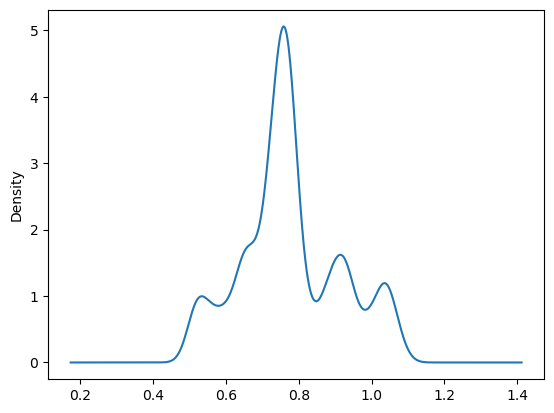

In [9]:
df1.Ex_rate.plot(kind='kde')

# Lag Plot

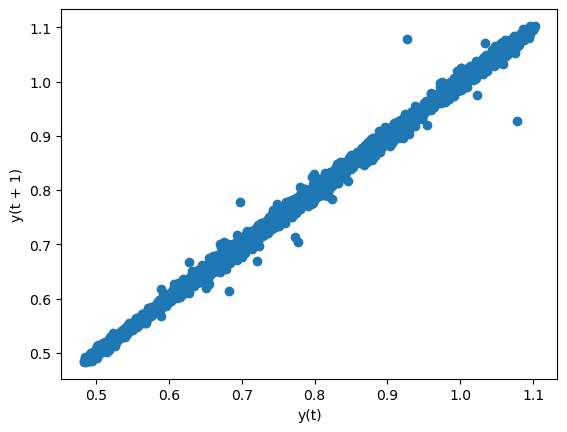

In [10]:
# create a scatter plot

from pandas.plotting import lag_plot

lag_plot(df1)
plt.show()

# ACF Plot

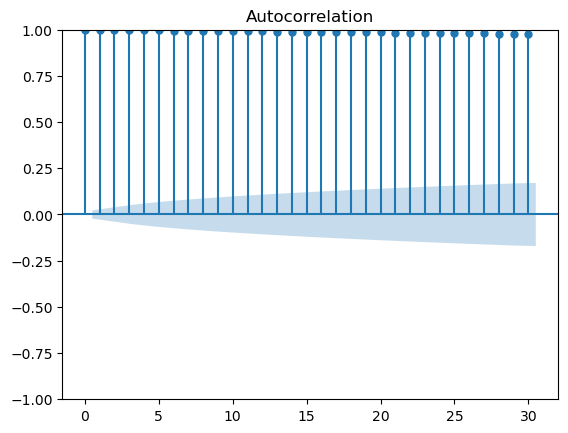

In [11]:
# create an autocorrelation plot

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df1,lags=30)
plt.show()

# Square Transformation

In [12]:
upsampled = df1.resample('D').mean()
print(upsampled.head(32))

            Ex_rate
date               
1990-01-01   0.7855
1990-01-02   0.7500
1990-01-03   0.7471
1990-01-04   0.7587
1990-01-05   0.7852
1990-01-06   0.7925
1990-01-07   0.8291
1990-01-08   0.7765
1990-01-09   0.7734
1990-01-10   0.7765
1990-01-11   0.7713
1990-01-12   0.7838
1990-01-13   0.7935
1990-01-14   0.7954
1990-01-15   0.7751
1990-01-16   0.7622
1990-01-17   0.7583
1990-01-18   0.7605
1990-01-19   0.7635
1990-01-20   0.7660
1990-01-21   0.7685
1990-01-22   0.7702
1990-01-23   0.7735
1990-01-24   0.7655
1990-01-25   0.7665
1990-01-26   0.7575
1990-01-27   0.7545
1990-01-28   0.7493
1990-01-29   0.7521
1990-01-30   0.7521
1990-01-31   0.7457
1990-02-01   0.7818


            Ex_rate
date               
1990-01-01   0.7855
1990-01-02   0.7500
1990-01-03   0.7471
1990-01-04   0.7587
1990-01-05   0.7852
1990-01-06   0.7925
1990-01-07   0.8291
1990-01-08   0.7765
1990-01-09   0.7734
1990-01-10   0.7765
1990-01-11   0.7713
1990-01-12   0.7838
1990-01-13   0.7935
1990-01-14   0.7954
1990-01-15   0.7751
1990-01-16   0.7622
1990-01-17   0.7583
1990-01-18   0.7605
1990-01-19   0.7635
1990-01-20   0.7660
1990-01-21   0.7685
1990-01-22   0.7702
1990-01-23   0.7735
1990-01-24   0.7655
1990-01-25   0.7665
1990-01-26   0.7575
1990-01-27   0.7545
1990-01-28   0.7493
1990-01-29   0.7521
1990-01-30   0.7521
1990-01-31   0.7457
1990-02-01   0.7818


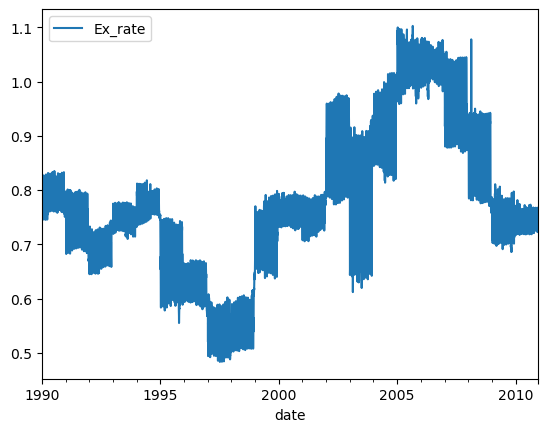

In [13]:
# Interpolate the missing value
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
plt.show()

# Before Tranformation

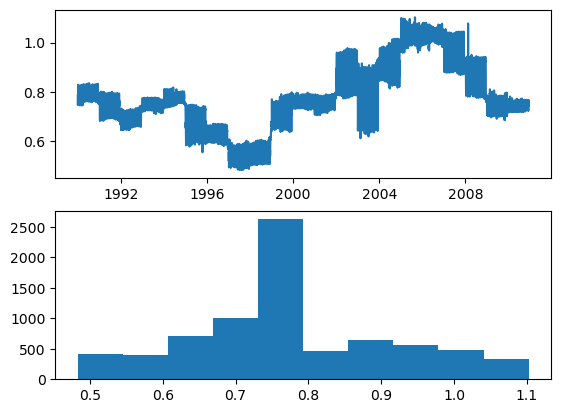

In [14]:
# line plot
plt.subplot(211)
plt.plot(interpolated)
plt.subplot(212)
plt.hist(interpolated)
plt.show()

In [15]:
interpolated

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.750000
1990-01-03,0.747100
1990-01-04,0.758700
1990-01-05,0.785200
...,...
2010-12-05,0.760427
2010-12-06,0.756344
2010-12-07,0.765931


# Square Root Transform

In [16]:
dataframe = pd.DataFrame(interpolated)
dataframe.columns = ['Ex_rate']
dataframe['Ex_rate'] = np.sqrt(dataframe['Ex_rate'])

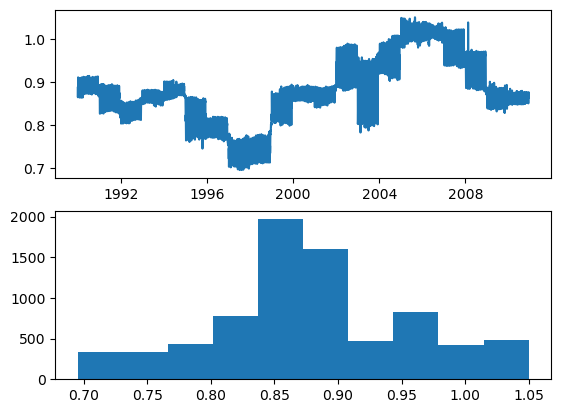

In [17]:
# line plot
plt.subplot(211)
plt.plot(dataframe['Ex_rate'])
# Histogram
plt.subplot(212)
plt.hist(dataframe['Ex_rate'])
plt.show()

# interpolated

# Log Transform

In [18]:
dataframe=pd.DataFrame(interpolated)
dataframe.columns=['Ex_rate']
dataframe['Ex_rate']=np.log(dataframe['Ex_rate'])

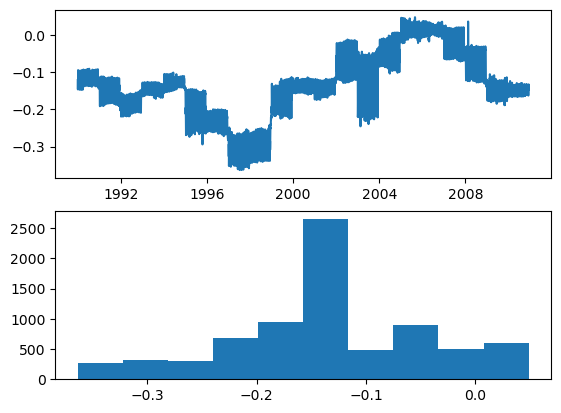

In [19]:
# Line plot
plt.subplot(211)
plt.plot(dataframe['Ex_rate'])
# Histogram
plt.subplot(212)
plt.hist(dataframe['Ex_rate'])
plt.show()

# interpolated

In [20]:
interpolated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7648 entries, 1990-01-01 to 2010-12-09
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7648 non-null   float64
dtypes: float64(1)
memory usage: 119.5 KB


<Axes: xlabel='date', ylabel='Ex_rate'>

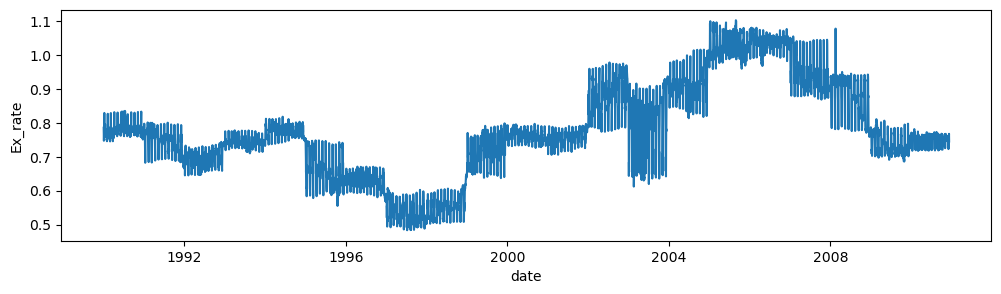

In [21]:
plt.figure(figsize=(12,3))
sns.lineplot(x="date",y="Ex_rate",data=df1)

# Moving Average

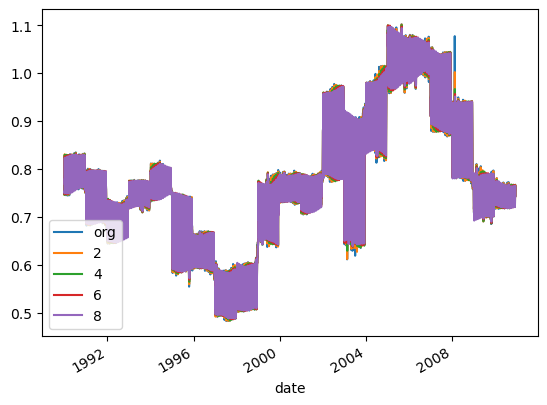

In [22]:
df1.Ex_rate.plot(label="org")
for i in range(2,10,2):
    df1["Ex_rate"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

<Axes: xlabel='date'>

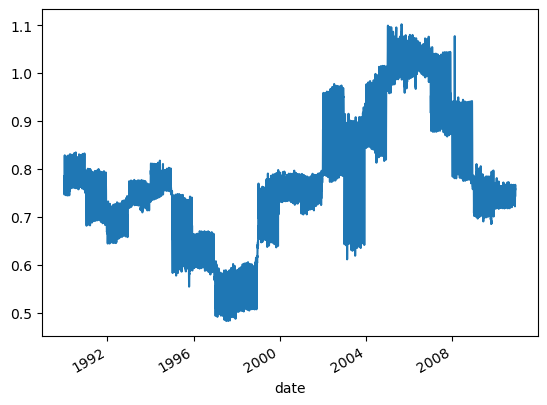

In [23]:
df1.Ex_rate.plot()

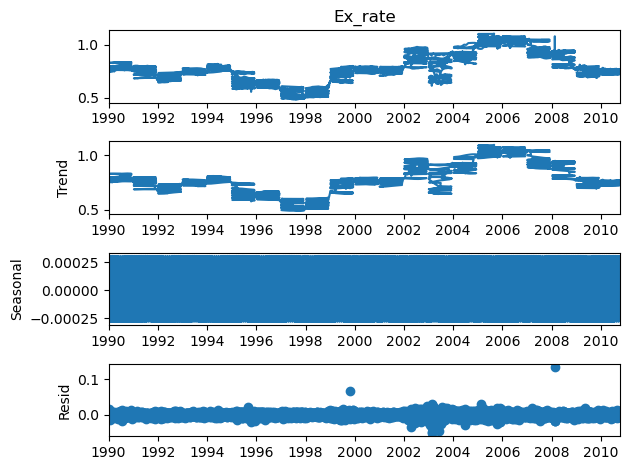

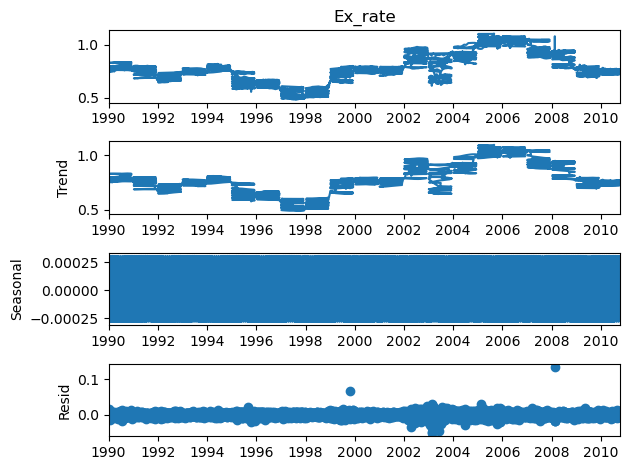

In [24]:
seasonal_ts_add=seasonal_decompose(df1["Ex_rate"], period=10)
seasonal_ts_add.plot()

# Predict with new Data

In [33]:
t = np.arange(1,7589)
t

array([   1,    2,    3, ..., 7586, 7587, 7588])

In [34]:
t_squared=np.array(t*t)
t_squared

array([       1,        4,        9, ..., 57547396, 57562569, 57577744])

# Building Model & RMSE Value

In [35]:
# Splitting the data into train and test
Train = df1.head(7588)
Test = df1.tail(16)
df1

,Ex_rate,t,t_squared
date,,,
1990-01-01,-0.241435,1,1
1990-02-01,-0.246156,2,4
1990-03-01,-0.239908,3,9
1990-04-01,-0.240798,4,16
1990-05-01,-0.242199,5,25
...,...,...,...
2010-06-10,-0.330598,7584,57517056
2010-07-10,-0.325953,7585,57532225
2010-08-10,-0.324074,7586,57547396


In [36]:
df1["t"] = np.arange(1,7589)
df1["t_squared"] = df1["t"]*df1["t"]
df1["Ex_rate"] = np.log(df1["Ex_rate"])

C:\Users\Kajal\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Kajal\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [37]:
df1

,Ex_rate,t,t_squared
date,,,
1990-01-01,NaN,1,1
1990-02-01,NaN,2,4
1990-03-01,NaN,3,9
1990-04-01,NaN,4,16
1990-05-01,NaN,5,25
...,...,...,...
2010-06-10,NaN,7584,57517056
2010-07-10,NaN,7585,57532225
2010-08-10,NaN,7586,57547396


<Axes: xlabel='Ex_rate', ylabel='date'>

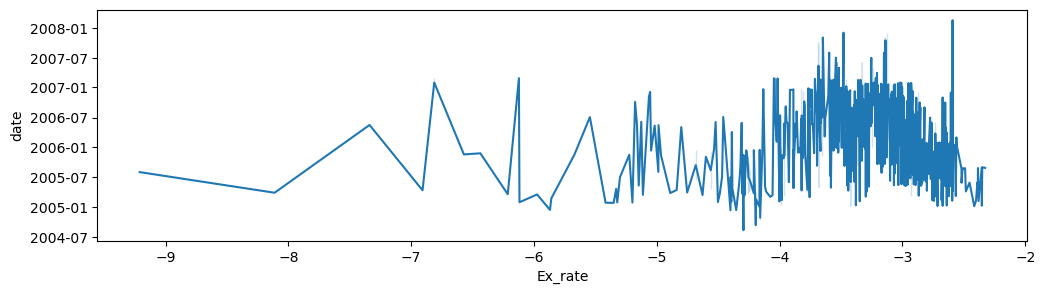

In [38]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Ex_rate",y="date",data=df1)

In [39]:
# Linear Model
linear_model = smf.ols('Ex_rate~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Ex_rate'])-np.array(pred_linear))**2))
rmse_linear

0.2030687033514803

In [40]:
# Exponential Model
Exp = smf.ols('Ex_rate~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Ex_rate'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

1.2102003489061246

In [41]:
# Quadratic Model
Quad = smf.ols('Ex_rate~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Ex_rate'])-np.array(pred_Quad))**2))
rmse_Quad

0.2701989018761348

In [42]:
# Additive seasonality
add_sea = smf.ols('Ex_rate~t',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['t']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Ex_rate'])-np.array(pred_add_sea))**2))
rmse_add_sea

0.2030687033514803

In [43]:
#Multiplicative Seasonality

Mul_sea = smf.ols('Ex_rate~t+t_squared',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Ex_rate'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1.2716519702816342

In [44]:
#Multiplicative addditive seasonality

Mul_Add_sea = smf.ols('Ex_rate~t+t_squared',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Ex_rate'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

1.2716519702816342

# Testing

In [45]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,rmse_linear
1,rmse_Exp,rmse_Exp
2,rmse_Quad,rmse_Quad
3,rmse_add_sea,rmse_add_sea
4,rmse_add_sea_quad,rmse_add_sea_quad
5,rmse_Mult_sea,rmse_Mult_sea
6,rmse_Mult_add_sea,rmse_Mult_add_sea


# Predict with new Data

In [46]:
t = np.arange(97,108)
t

array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107])

In [47]:
t_squared=np.array(t*t)
t_squared

array([ 9409,  9604,  9801, 10000, 10201, 10404, 10609, 10816, 11025,
       11236, 11449])

In [48]:
Month = pd.DataFrame({'Month':['2003-01-01','2003-02-01','2003-03-01','2003-04-01','2003-05-01','2003-06-01','2003-07-01',
                               '2003-08-01','2003-09-01','2003-10-01','2003-10-01']})

In [49]:
df={'t':t,'t_squared':t_squared}
df=pd.DataFrame(df)

In [50]:
newdata = pd.concat([Month,df],axis=1)
newdata

,Month,t,t_squared
0,2003-01-01,97,9409
1,2003-02-01,98,9604
2,2003-03-01,99,9801
3,2003-04-01,100,10000
4,2003-05-01,101,10201
5,2003-06-01,102,10404
6,2003-07-01,103,10609
7,2003-08-01,104,10816
8,2003-09-01,105,11025
9,2003-10-01,106,11236


# Building model on entire dataset

In [51]:
model_full = smf.ols('t_squared~t',data=df1).fit()
pred_new  = pd.Series(model_full.predict(newdata))
pred_new

0    -8863952.0
1    -8856363.0
2    -8848774.0
3    -8841185.0
4    -8833596.0
5    -8826007.0
6    -8818418.0
7    -8810829.0
8    -8803240.0
9    -8795651.0
10   -8788062.0
dtype: float64

In [52]:
newdata["forecasted_Ex_rate"]=pd.Series(pred_new)

In [53]:
newdata

,Month,t,t_squared,forecasted_Ex_rate
0,2003-01-01,97,9409,-8863952.0
1,2003-02-01,98,9604,-8856363.0
2,2003-03-01,99,9801,-8848774.0
3,2003-04-01,100,10000,-8841185.0
4,2003-05-01,101,10201,-8833596.0
5,2003-06-01,102,10404,-8826007.0
6,2003-07-01,103,10609,-8818418.0
7,2003-08-01,104,10816,-8810829.0
8,2003-09-01,105,11025,-8803240.0
9,2003-10-01,106,11236,-8795651.0
